<a href="https://colab.research.google.com/github/brittdecker/Probability/blob/master/CommunicationsExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Brittany Decker

Homework 3

7.* A communications system transmits binary coded random signalsXwith amplitude±Awith the probabilities of the two symbols beingPr[X=A] =pandPr[X=−A] = 1−p.


Probability of A:  0.6
Probability of -A:  0.4
6123
3877


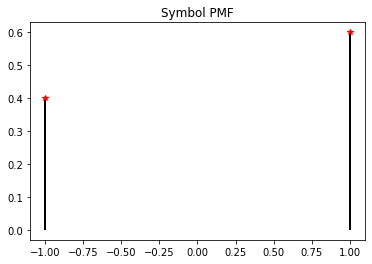

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import math
from scipy.stats import rv_discrete


# Set up the baseline assumptions
Symbols = (1, -1)
p = 0.6
P_A = 0.6
P_mA = 1 - P_A

print('Probability of A: ', P_A)
print('Probability of -A: ', P_mA)

# A sample of output signals X
probabilities = (P_A,P_mA)
bits = rv_discrete(values=(Symbols,probabilities))
X = bits.rvs(size=10000)

TX_A = 0
TX_mA = 0

for sample in X:
  if sample > 0:
    TX_A += 1
  else:
    TX_mA += 1

print(TX_A)
print(TX_mA)


#displaying setup
fig, ax = plt.subplots(1,1)
ax.plot(Symbols,bits.pmf(Symbols),'r*')
ax.vlines(Symbols,ymin=0,ymax=bits.pmf(Symbols),lw=2)
plt.title('Symbol PMF',loc='center')
plt.show()



The channel induces additive noise that is modeled by a Gaussian random variableYwitha pdfN(0,σ2y). The received variable isZ=X+Y.

(a) Simulate the received signalZand estimate its probability density function f[Z(z)] .

(b) Derive the exact pdf of Z. [ You will need to do some research for this ]



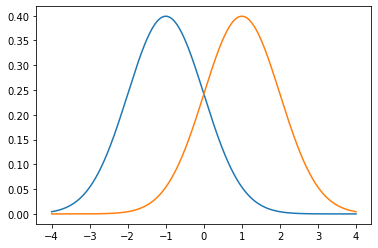

In [33]:
# Create Noise
Y_1 = stats.norm(-1, 1) # Declare A to be a normal random variable
Y_2 = stats.norm(1, 1) # Declare A to be a normal random variable

SNR_set = 0.0

Y_A = Y_2.rvs(size=10000)
Y_mA = Y_1.rvs(size=10000)

x = np.linspace(-4,4,1000)
plt.plot(x, Y_1.pdf(x))
plt.plot(x, Y_2.pdf(x))

def Calc_Z(SNR, X):
  N_o = 1/((pow(10.0,(SNR/10.0))))
  AWGN = stats.norm(0, N_o)

  Y = AWGN.rvs(size=10000)


  # PDF of Z
  Z = np.add(X,Y)

  return Z






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

(c) The receiver has to decode if a +A or −A was transmitted. This requires that one calcu-late the posterior probabilitiesP[A|z] andP[−A|z]. Find the decision rule that minimizes the probability of error in the decoding process. Use the signal to noise ratio (SNR)EbN0asa control parameter whereEbis the energy per symbol or bit duration andN0is the noisespectral density that is a function of the varianceσ2y.


SNR:  0
TX_A:  6123
RX_A:  4051
TX mA: 3877
RX_mA:  5949
SNR:  1
TX_A:  6123
RX_A:  4162
TX mA: 3877
RX_mA:  5838
SNR:  2
TX_A:  6123
RX_A:  4292
TX mA: 3877
RX_mA:  5708
SNR:  3
TX_A:  6123
RX_A:  4631
TX mA: 3877
RX_mA:  5369
SNR:  4
TX_A:  6123
RX_A:  4931
TX mA: 3877
RX_mA:  5069
SNR:  5
TX_A:  6123
RX_A:  5224
TX mA: 3877
RX_mA:  4776
SNR:  6
TX_A:  6123
RX_A:  5586
TX mA: 3877
RX_mA:  4414
SNR:  7
TX_A:  6123
RX_A:  5833
TX mA: 3877
RX_mA:  4167
SNR:  8
TX_A:  6123
RX_A:  6032
TX mA: 3877
RX_mA:  3968
SNR:  9
TX_A:  6123
RX_A:  6097
TX mA: 3877
RX_mA:  3903
SNR:  10
TX_A:  6123
RX_A:  6117
TX mA: 3877
RX_mA:  3883
[2072, 1961, 1831, 1492, 1192, 899, 537, 290, 91, 26, 6]
6


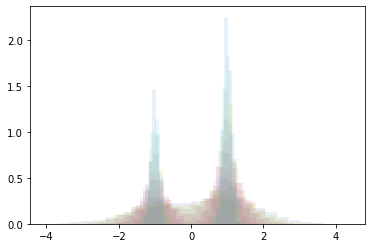

In [44]:
PA_post = (Y_A * P_A)/Z
PmA_post = (Y_mA * P_mA)/Z

Zth = (1-p)/p
num_A = 0
num_mA = 0
errors = []
SNRval = []

for SNR in range(11):
  num_A = 0
  num_mA = 0
  Z = Calc_Z(SNR, X)
  plt.hist(Z, bins = 25, density=True, histtype='stepfilled', alpha=0.1)
  for sample in Z:
    if sample > Zth:
      num_A += 1
    else:
      num_mA += 1
  BER_A = TX_A - num_A
  SNRval.append(SNR)
  errors.append(BER_A)
    

print(errors)
print(BER_A)



#plt.hist(Y_A, bins = 25, density=True, histtype='stepfilled', alpha=0.1)
#plt.hist(Y_mA, bins = 25, density=True, histtype='stepfilled', alpha=0.1)
#plt.hist(Z, bins = 25, density=True, histtype='stepfilled', alpha=0.1)
#plt.hist(PA_post, bins = 2, density=True, histtype='stepfilled', alpha=0.5)
#plt.hist(PmA_post, bins = 2, density=True, histtype='stepfilled', alpha=0.5)


(d) Plot the simulated bit error rate as a function of SNR varying from 0 to 10 decibels.

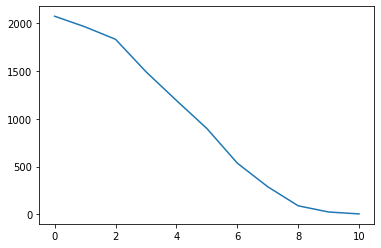

In [45]:
plt.plot(SNRval,errors)